In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
#Import raw data 
bl_csv= pd.read_csv(r"raw_data.csv")
bl_csv.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
#Import validation data
bv_csv= pd.read_csv(r"validation.csv")
bv_csv.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [42]:
# Convert raw data to DataFrame
df = pd.DataFrame(data = bl_csv)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
#import skim
from skimpy import skim

skim(df)
    

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25    ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ ApplicantIncome        │   0 │      0 │   5400 │   6100 │  150 │   2900 │  3800 │  5800 │  81000 │    ▇    │  │
│ │ CoapplicantIncome      │   0 │      0 │   1600 │   2900 │    0 │      0 │  1200 │  2300 │  42000 │    ▇    │  │
│ │ LoanAmount             │  22 │   3.58 │    150 │     86 │    9 │    100 │   130 │   170 │    700 │   ▇▇▁   │  │
│ │ Loan_Amount_Term       │  14 │   2.28 │    340 │     65 │   12 │    360 │   360 │   360 │    480 │    ▁ ▇  │  │
│ │ Credit_History         │  50 │   8.14 │   0.84 │   0.36 │    0 │      1 │     1 │     1 │      1 │ ▁    ▇  │  │
│ └────────────────────────┴─────┴────────┴────────┴────────┴──────┴────────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Loan_ID                      │      0 │          0 │                           1 │                     614 │  │
│ │ Gender                       │     13 │       2.12 │                        0.98 │                     601 │  │
│ │ Married                      │      3 │       0.49 │                           1 │                     611 │  │
│ │ Dependents                   │     15 │       2.44 │                        0.98 │                     599 │  │
│ │ Education                    │      0 │          0 │                         1.2 │                     748 │  │
│ │ Self_Employed                │     32 │       5.21 │                        0.95 │                     582 │  │
│ │ Property_Area                │      0 │          0 │                           1 │                     614 │  │
│ │ Loan_Status                  │      0 │          0 │                           1 │                     614 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [44]:
df.dropna(inplace=True)
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 480    │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25    ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ ApplicantIncome        │   0 │      0 │   5400 │   5700 │  150 │   2900 │  3900 │  5900 │  81000 │    ▇    │  │
│ │ CoapplicantIncome      │   0 │      0 │   1600 │   2600 │    0 │      0 │  1100 │  2300 │  34000 │    ▇    │  │
│ │ LoanAmount             │   0 │      0 │    140 │     81 │    9 │    100 │   130 │   170 │    600 │   ▅▇▁   │  │
│ │ Loan_Amount_Term       │   0 │      0 │    340 │     65 │   36 │    360 │   360 │   360 │    480 │   ▁  ▇  │  │
│ │ Credit_History         │   0 │      0 │   0.85 │   0.35 │    0 │      1 │     1 │     1 │      1 │ ▁    ▇  │  │
│ └────────────────────────┴─────┴────────┴────────┴────────┴──────┴────────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Loan_ID                      │      0 │          0 │                           1 │                     480 │  │
│ │ Gender                       │      0 │          0 │                           1 │                     480 │  │
│ │ Married                      │      0 │          0 │                           1 │                     480 │  │
│ │ Dependents                   │      0 │          0 │                           1 │                     480 │  │
│ │ Education                    │      0 │          0 │                         1.2 │                     577 │  │
│ │ Self_Employed                │      0 │          0 │                           1 │                     480 │  │
│ │ Property_Area                │      0 │          0 │                           1 │                     480 │  │
│ │ Loan_Status                  │      0 │          0 │                           1 │                     480 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

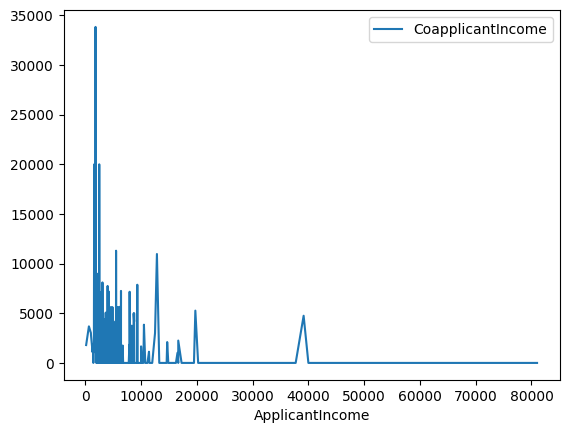

In [45]:
# Changed to line graph to better display data
(
    df.sort_values(by='ApplicantIncome', ascending=True)
).plot(
    kind='line', 
    x='ApplicantIncome', 
    y='CoapplicantIncome'
);

In [46]:
from scipy.stats import entropy

# Assuming df is your DataFrame
for col in df.columns:
    ln = col + ':'
    print(f'Entropy of {ln:<20}  {round(entropy(df[col].value_counts(normalize=True), base=np.e),7)}')

print(f'Entropy of {"Value_Counts:":<21} {round(entropy(df.value_counts(normalize=True), base=np.e),7)}')


Entropy of Loan_ID:              6.1737861
Entropy of Gender:               0.4701275
Entropy of Married:              0.6487268
Entropy of Dependents:           1.1353673
Entropy of Education:            0.503277
Entropy of Self_Employed:        0.4003992
Entropy of ApplicantIncome:      5.90691
Entropy of CoapplicantIncome:    3.6493222
Entropy of LoanAmount:           4.9140062
Entropy of Loan_Amount_Term:     0.6258841
Entropy of Credit_History:       0.415413
Entropy of Property_Area:        1.089054
Entropy of Loan_Status:          0.6177606
Entropy of Value_Counts:         6.1737861


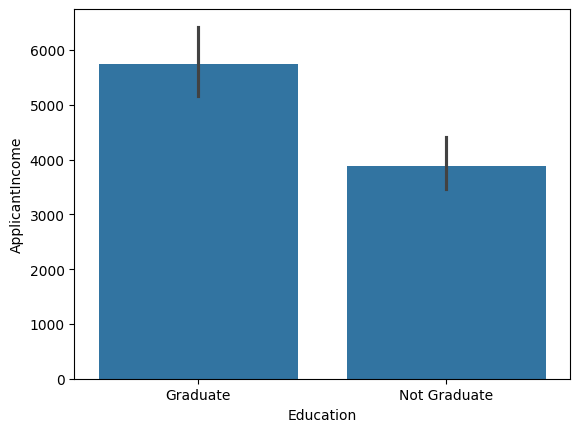

In [47]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Education',y='ApplicantIncome');

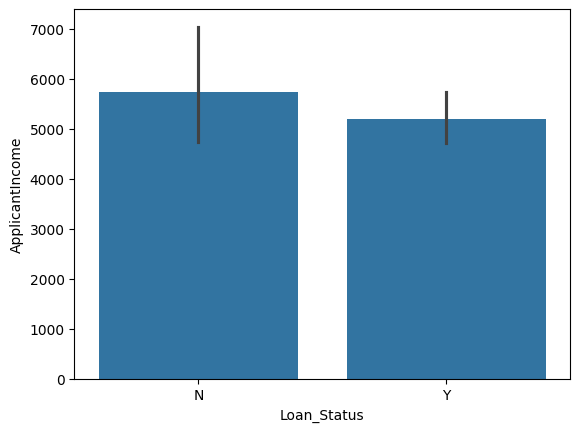

In [48]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Loan_Status',y='ApplicantIncome');

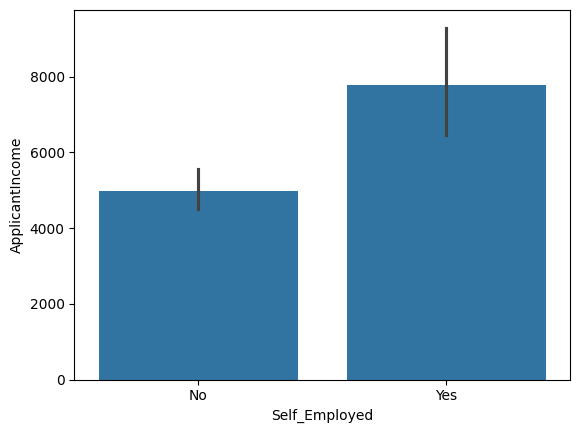

In [49]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Self_Employed',y='ApplicantIncome');

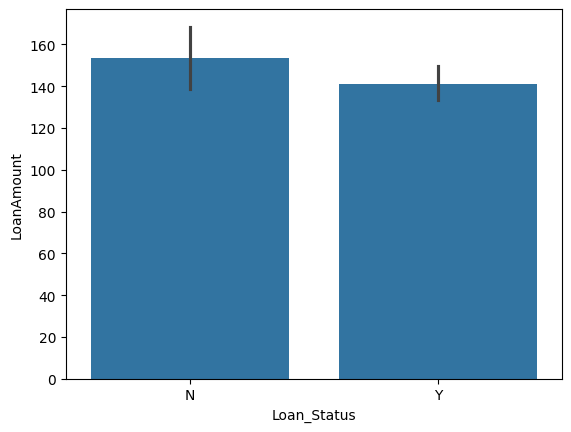

In [50]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Loan_Status',y='LoanAmount');

In [51]:
def pandas_entropy(column, base=None):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    base = np.e if base is None else base
    return -(vc * np.log(vc)/np.log(base)).sum()

In [52]:
import pandas as pd
from scipy.stats import entropy

# Assuming df is your DataFrame
for col in df.columns:
    print(f'Entropy of {col}: {entropy(df[col].value_counts(normalize=True), base=np.e)}')

print(entropy(df.value_counts(normalize=True), base=np.e))


Entropy of Loan_ID: 6.173786103901938
Entropy of Gender: 0.4701275086077958
Entropy of Married: 0.6487267736733091
Entropy of Dependents: 1.1353672633586132
Entropy of Education: 0.5032770085456542
Entropy of Self_Employed: 0.40039917444896944
Entropy of ApplicantIncome: 5.9069099988916145
Entropy of CoapplicantIncome: 3.6493222440205297
Entropy of LoanAmount: 4.9140062375497084
Entropy of Loan_Amount_Term: 0.6258841231702227
Entropy of Credit_History: 0.4154129738607282
Entropy of Property_Area: 1.0890540297842057
Entropy of Loan_Status: 0.6177606326574299
6.173786103901938


In [53]:
import pandas as pd
from scipy.stats import entropy

# Assuming df is your DataFrame
for col in df.columns:
    print(f'Entropy of {col}: {entropy(df[col].value_counts(normalize=True), base=np.e)}')

print(entropy(df.value_counts(normalize=True), base=np.e))


Entropy of Loan_ID: 6.173786103901938
Entropy of Gender: 0.4701275086077958
Entropy of Married: 0.6487267736733091
Entropy of Dependents: 1.1353672633586132
Entropy of Education: 0.5032770085456542
Entropy of Self_Employed: 0.40039917444896944
Entropy of ApplicantIncome: 5.9069099988916145
Entropy of CoapplicantIncome: 3.6493222440205297
Entropy of LoanAmount: 4.9140062375497084
Entropy of Loan_Amount_Term: 0.6258841231702227
Entropy of Credit_History: 0.4154129738607282
Entropy of Property_Area: 1.0890540297842057
Entropy of Loan_Status: 0.6177606326574299
6.173786103901938


In [54]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [55]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)
df["Married"] = df["Married"].apply(lambda x: 1 if x == "Yes" else 0)
df["Education"] = df["Education"].apply(lambda x: 1 if x == "Graduate" else 0)
df["Self_Employed"] = df["Self_Employed"].apply(lambda x: 1 if x == "Yes" else 0)

In [56]:
df[["Gender", "Married", "Education", "Self_Employed"]].head()

,Gender,Married,Education,Self_Employed
1,1,1,1,0
2,1,1,1,1
3,1,1,0,0
4,1,0,1,0
5,1,1,1,1


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "target" is the target variable
# Drop the ID column
X = df.drop(["Loan_Status", "Loan_ID"], axis=1)
y = df["Loan_Status"]

# Convert the '3+' values to a numerical format

In [58]:
# Drop the ID column
X = df.drop(["Loan_Status", "Loan_ID"], axis=1)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(5), object(4)
memory usage: 52.5+ KB


In [60]:
Ydf =df["Loan_Status"]
Ydf

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object

In [61]:
Ydf =df["Loan_Status"]
if Ydf=="Y":
    Ydf

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().